<a href="https://colab.research.google.com/github/AnneHelleSylve/ComputationalAndStatisticalTechnique/blob/master/T%C3%A9cnicas_Computacionales_y_Estad%C3%ADsticas_Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Técnicas Computacionales y Estadísticas.
##Tarea 1. Introducción a LATEX, Python y Recursos de la Red

In [19]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file #Requerida para descargar el archivo FITS
from astropy.io import fits #Para manipulación y visualización del archivo Fits
from astropy.stats import sigma_clip

1. Empleando el servidor MAST descargue las observaciones del Hubble Space Telescope (HST) de la “nebulosa del anillo” (objeto Messier 57). En específico localice las observaciones del Hubble Legacy Archive (HLA) con el ID de la propuesta: 12309 (P.I. O’Dell); ObsID (hst_12309_01_wfc3_uvis_f656n).

In [5]:
M57_fits = download_file('https://hla.stsci.edu/cgi-bin/getdata.cgi?dataset=hst_12309_01_wfc3_uvis_f656n_drz.fits', cache=True )
M57_hdul = fits.open(M57_fits)
M57_hdul.info()

Filename: /root/.astropy/cache/download/py3/62ea90f15b90623207117ff3a3ad0691
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     872   ()      
  1  SCI           1 ImageHDU        88   (5656, 5800)   float32   
  2  WHT           1 ImageHDU        47   (5656, 5800)   float32   
  3  CTX           1 ImageHDU        42   (5656, 5800)   int32   
  4  HDRTAB        1 BinTableHDU    557   4R x 274C   [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, J, 11A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, J, 8A, 23A, D, D, D, D, J, J, 8A, 23A, 9A, 18A, 4A, J, D, D, D, J, J, J, J, 23A, D, D, D, D, J, J, 4A, 3A, 4A, J, D, D, D, 23A, 1A, J, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, J, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, J, 5A, 4A, D, 13A, 8A, 4A, 3A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, J, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, J, J, J, J, D, 3A, J, D, 5A, 7A, D, 

Realice un programa que ejecute los siguientes procedimientos:


(a) Despliegue la imagen de ciencia (HDU 1 del archivo con terminación drz.fits). Añada una barra de color. Utilice las unidades adecuadas para los ejes y la barra de color.

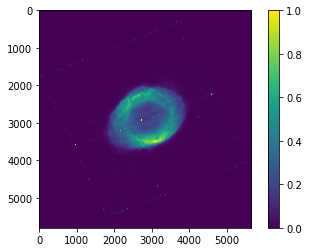

In [6]:
M57_SCI = M57_hdul['SCI'].data
plt.imshow(M57_SCI, cmap='viridis',vmin=0, vmax=1)
plt.colorbar()

(b) Despliegue la imagen de pesos (HDU 2 del archivo con terminación drz.fits). Añada una barra de color. Utilice las unidades adecuadas para los ejes y la barra de color.

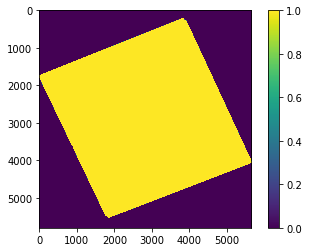

In [12]:
M57_WHT = M57_hdul['WHT'].data
plt.imshow(M57_WHT, cmap='viridis',vmin=0, vmax=1)
plt.colorbar()

(c) Despliegue el histograma de los píxeles de la imagen de ciencia.

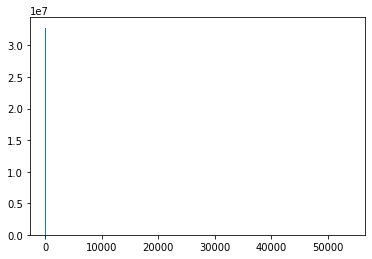

In [13]:
histograma = plt.hist(M57_SCI.flatten(), 1000)

(d) Acceda a la información del encabezado y obtenga el tiempo de exposición de la imagen, la fecha en la que se realizó la observación, el tamaño del píxel y las coordenadas del píxel central en coordenadas ecuatoriales.

In [14]:
M57_Encabezados = M57_hdul[0]
print ('Tiempo de Exposición: ', M57_Encabezados.header['EXPTIME'])
print ('Fecha de Observación: ', M57_Encabezados.header['DATE-OBS'])
#print ('Tamaño de pixel en grados: ', M57_Encabezados.header['CDELT1'], M57_Encabezados.header['CDELT2'])
#print ('Coordenadas Equatoriales en grados: ', M57_Encabezados.header['CRPIX1'], M57_Encabezados.header['CRPIX2'])

Tiempo de Exposición:  1120.0
Fecha de Observación:  2011-09-19


(e) Calcule el valor máximo, mínimo, el promedio y la desviación estándar de la imagen de ciencia.

In [15]:
print('Mínimo:', np.min(M57_SCI))
print('Máximo:', np.max(M57_SCI))
print('Promedio:', np.mean(M57_SCI))
print('Desviación Estándar:', np.std(M57_SCI))

Mínimo: -0.028128875
Máximo: 53946.867
Promedio: 0.034581296
Desviación Estándar: 9.853648


(f) Debido a la geometría del CCD algunos píxeles en la imagen no fueron expuestos, estos píxeles se identifican con un valor cero en la imagen de pesos. Utilizando la función where de la librería numpy (o alguna función similar), encuentre en la imagen de pesos los índices de los píxeles
expuestos. Utilice estos índices para calcular el máximo, mínimo, el promedio y la desviación estándar de los píxeles expuestos en la imagen de ciencia. Compare con los resultados del inciso anterior.

In [55]:
M57_IndicesExp = np.where(M57_WHT!=0.)
print('Minimo:', np.min(M57_SCI[M57_IndicesExp]))
print('Máximo:', np.max(M57_SCI[M57_IndicesExp]))
print('Promedio:', np.mean(M57_SCI[M57_IndicesExp]))
print('Desviación Estándar:', np.std(M57_SCI[M57_IndicesExp]))

Minimo: -0.028128875
Máximo: 53946.867
Promedio: 0.06522729
Desviación Estándar: 13.533891


(g) En ocasiones, algunos píxeles son afectados por rayos cósmicos, produciendo valores extremadamente grandes en la imagen. Utilice la función sigma clip de la librería astropy.stats (o alguna función similar) para eliminar estos píxeles. Calcule nuevamente el valor máximo, mínimo, el promedio y la desviación estándar.

In [56]:

M57_SCI_Sigma = sigma_clip(M57_SCI[M57_IndicesExp])
print('Minimo:', np.min(M57_SCI_Sigma))
print('Máximo:', np.max(M57_SCI_Sigma))
print('Promedio:', np.mean(M57_SCI_Sigma))
print('Desviación Estándar:', np.std(M57_SCI_Sigma))

Minimo: -0.028128875
Máximo: 0.07261351
Promedio: 0.005225617099213641
Desviación Estándar: 0.008191412685329332


(h) Despliegue nuevamente la imagen de ciencia, en esta ocasión utilice como máximo y mínimo de la escala de color los valores encontrados en el inciso (g).

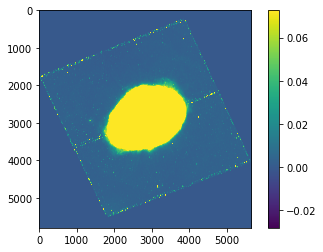

In [57]:
plt.imshow(M57_SCI, cmap='viridis',vmin=-0.028128875, vmax=0.07261351)
plt.colorbar()

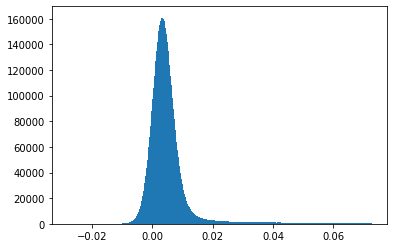

In [58]:
histograma = plt.hist(M57_SCI_Sigma.flatten(), 1000)

(i) Obtenga del encabezado el filtro empleado en esta observación.

In [59]:
print ('Filtro: ', M57_Encabezados.header['FILTER'])

Tiempo de Exposición:  F656N
